In [1]:
#Import 
# Biasa
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

from numpy.random import randn

# Statistik
from scipy import stats


# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Perintah memunculkan
%matplotlib inline

In [2]:
dataset = randn(25)

(0, 1)

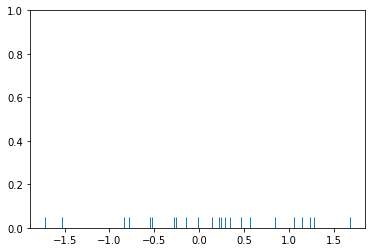

In [4]:
sns.rugplot(dataset)
plt.ylim(0,1)

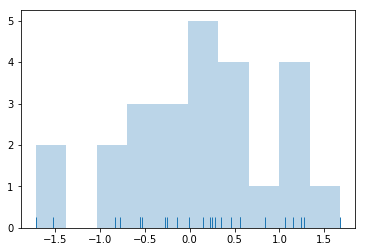

In [5]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

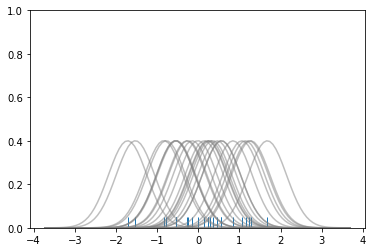

In [6]:
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwith =( (4*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []
for data_point in dataset :
    
    #membuat sebuah kernel tiap poin dan menambahnya pada kernel
    kernel = stats.norm(data_point,bandwith).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the basis functions')

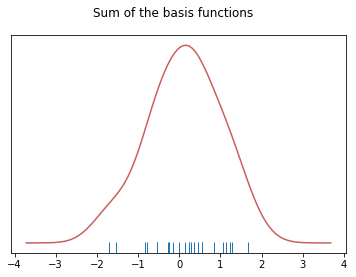

In [8]:
sum_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis functions")

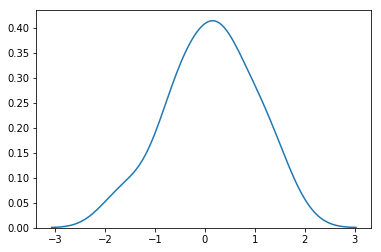

In [9]:
sns.kdeplot(dataset)

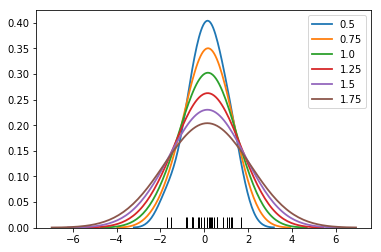

In [10]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

In [11]:
url = 'https://en.wikipedia.org/wiki/Kernel_(statistics)'

In [12]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

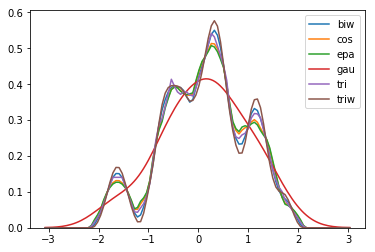

In [13]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

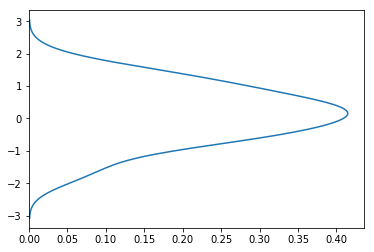

In [14]:
sns.kdeplot(dataset,vertical=True)

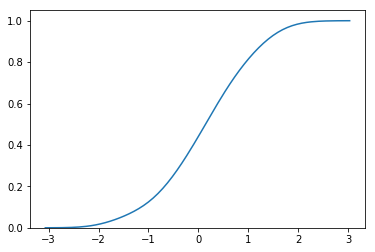

In [15]:
sns.kdeplot(dataset,cumulative =True)

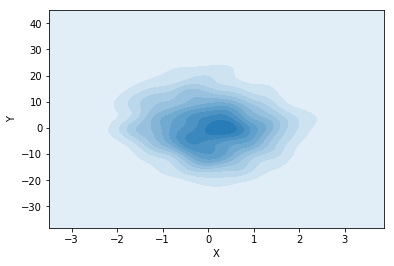

In [18]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

df = pd.DataFrame(dataset2,columns=['X','Y'])

sns.kdeplot(df.X,df.Y,shade=True)

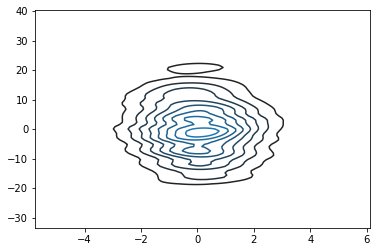

In [19]:
sns.kdeplot(df,bw=1)

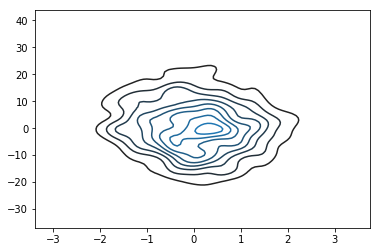

In [20]:
sns.kdeplot(df,bw='silverman')

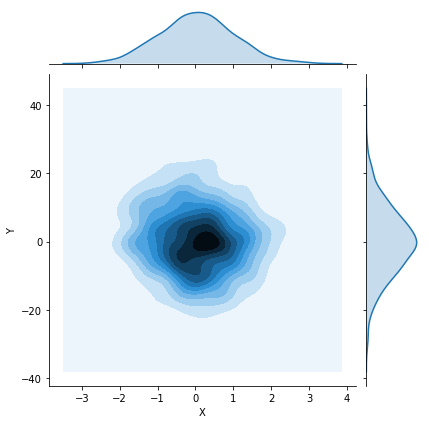

In [21]:
sns.jointplot('X','Y',df,kind='kde')